In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [7]:
import sys
sys.path.append("/vol/bitbucket/ad6013/Research/gp-causal")

In [8]:
from experiments.linear_gaussian_sample_size import generate_linear_gaussian_data
import tensorflow_probability as tfp
tfd = tfp.distributions

In [10]:
def sample_datagen_hyperparams(
    mean_0=0.0,
    var_0=2.0,
    alpha_0=1.0,
    beta_0=2.0,
    mean_1=4.0,
    var_1=1.0,
    alpha_1=1.0,
    beta_1=3.0,
    mean_2=10,
    var_2=0.1,
):
    a_0 = np.random.normal(mean_0, var_0)
    sigma_0 = scipy.stats.invgamma.rvs(alpha_0, beta_0)
    a_1 = np.random.normal(mean_1, var_1)
    sigma_1 = scipy.stats.invgamma.rvs(alpha_1, beta_1)
    w_0 = np.random.normal(mean_2, var_2)
    return (a_0, sigma_0, a_1, sigma_1, w_0)


def generate_linear_gaussian_data(
    a_0, sigma_0, a_1, sigma_1, sample_size
):
    X = np.random.normal(a_0, sigma_0, sample_size)
    Y = a_1 * X + np.random.normal(0.0, sigma_1, sample_size)
    assert X.shape == Y.shape
    return X, Y


In [11]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D


def find_mean_and_variances(a_0, sigma_0, a_1, sigma_1, w_0):
    mu_x = a_0
    mu_y = (a_1 * a_0) + w_0
    variance_x = (sigma_0**2)
    variance_y = (sigma_1**2 + (a_1**2) * sigma_0**2)
    variance_xy = (a_1 * sigma_0**2)
    return mu_x, mu_y, variance_x, variance_y, variance_xy


def plot_gaussian(
    mu_x, 
    mu_y,
    var_x, 
    var_y,
    var_xy,
    min_x,
    max_x,
    min_y,
    max_y,
    anticausal=False
):
    #Create grid and multivariate normal
    x = np.linspace(min_x,max_x,1000)
    y = np.linspace(min_y,max_y,1000)
    X, Y = np.meshgrid(x,y)
    pos = np.empty(X.shape + (2,))
    
    pos[:, :, 0] = X; pos[:, :, 1] = Y
    rv = multivariate_normal([mu_x, mu_y], [[var_x, var_xy], [var_xy, var_y]])

    #Make a 3D plot
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
    fig.set_size_inches(18.5, 10.5)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    plt.show()


def plot_contour(x, y):
    sns.kdeplot(x=x, y=y, bw=.15)

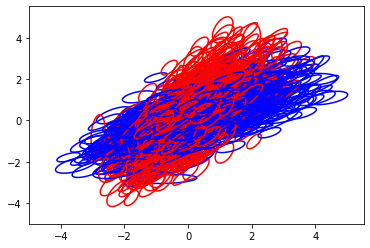

In [32]:
for i in range(1000):
    a_0, sigma_0, a_1, sigma_1, w_0 = sample_datagen_hyperparams(
        mean_0=0.0,
        var_0=1.0,
        alpha_0=5,
        beta_0=0.1,
        mean_1=1,
        var_1=0.1,
        alpha_1=5,
        beta_1=0.1,
        mean_2=0.2,
        var_2=1,
    )
    # mu_x, mu_y, var_x, var_y, var_xy = find_mean_and_variances(
    #     a_0=a_0, sigma_0=sigma_0, a_1=a_1, sigma_1=sigma_1
    # )
    # x, y = generate_linear_gaussian_data(
    #     a_0=a_0,
    #     sigma_0=sigma_0,
    #     a_1=a_1,
    #     sigma_1=sigma_1,
    #     sample_size=100
    # )
    N = 1000
    mean_0, mean_1, var_x, var_y, var_xy = find_mean_and_variances(
        a_0, sigma_0, a_1, sigma_1, w_0
    )
    X    = np.linspace(mean_0 - 2 * (sigma_0), mean_0 + 2 * (sigma_0), N)
    Y    = np.linspace(mean_1 - 2 * (var_y ** 0.5), mean_1 + 2 * (var_y ** 0.5), N)
    X, Y = np.meshgrid(X, Y)
    pos  = np.dstack((X, Y))
    rv   = multivariate_normal([mean_0, mean_1], [[var_x, var_xy], [var_xy, var_y]])
    Z    = rv.pdf(pos)
    plt.contour(X, Y, Z, levels=1, colors='red')

    X    = np.linspace(mean_0 - 2 * (sigma_0), mean_0 + 2 * (sigma_0), N)
    Y    = np.linspace(mean_1 - 2 * (var_y ** 0.5), mean_1 + 2 * (var_y ** 0.5), N)
    Y, X = np.meshgrid(Y, X)
    pos  = np.dstack((Y, X))
    rv   = multivariate_normal([mean_1, mean_0], [[var_y, var_xy], [var_xy, var_x]])
    Z    = rv.pdf(pos)
    plt.contour(Y, X, Z, levels=1, colors='blue')
    # plt.scatter(x,y, color='r')
    # plot_contour(
    #     x, y
    # )
# for i in range(10):
#     a_0, sigma_0, a_1, sigma_1 = sample_datagen_hyperparams(
#         mean_0=0.0,
#         var_0=20.0,
#         alpha_0=1.0,
#         beta_0=2.0,
#         mean_1=4.0,
#         var_1=20.0,
#         alpha_1=1.0,
#         beta_1=2.0,
#     )
#     # mu_x, mu_y, var_x, var_y, var_xy = find_mean_and_variances(
#     #     a_0=a_0, sigma_0=sigma_0, a_1=a_1, sigma_1=sigma_1
#     # )
#     # x, y = generate_linear_gaussian_data(
#     #     a_0=a_0,
#     #     sigma_0=sigma_0,
#     #     a_1=a_1,
#     #     sigma_1=sigma_1,
#     #     sample_size=100
#     # )
#     N = 2000
#     mean_0, mean_1, var_x, var_y, var_xy = find_mean_and_variances(
#         a_0, sigma_0, a_1, sigma_1
#     )
#     X    = np.linspace(mean_0 - 3 * (sigma_0), mean_0 + 3 * (sigma_0), N)
#     Y    = np.linspace(mean_1 - 3 * (var_y ** 0.5), mean_1 + 3 * (var_y ** 0.5), N)
#     Y, X = np.meshgrid(Y, X)
#     pos  = np.dstack((Y, X))
#     rv   = multivariate_normal([mean_1, mean_0], [[var_y, var_xy], [var_xy, var_x]])
#     Z    = rv.pdf(pos)
#     plt.contour(Y, X, Z, levels=1, colors='blue')
plt.show()
# plt.gcf()
# mu_y, mu_x, var_y, var_x, var_yx = find_mean_and_variances(
#     a_0=0, sigma_0=5.5, a_1=0.1, sigma_1=1
# )
# plot_gaussian(
#     mu_x, mu_y, var_x, var_y, var_yx, -5, 5, -10, 10 
# )

In [9]:
var_xy

-268642.34255843377

In [20]:
mean_0 - 2 * (sigma_0)

-5.704386263648008

In [ ]:
cov = np.array([[var_x, var_xy], [var_xy, var_y]])

In [ ]:
np.all(np.linalg.eigvals(cov) > 0)

False

In [ ]:
cov = np.array([[var_x, var_xy], [var_xy, var_y]])

In [ ]:
cov

array([[1.125, 1.5  ],
       [1.5  , 0.5  ]])